In [1]:
import numpy as np

# Load training data
Xtrain = np.loadtxt('Xtrain.csv')

# Load training labels
Ytrain = np.loadtxt('Ytrain.csv')

# Load test data
Xtest = np.loadtxt('Xtest.csv')

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def grid_search(classifier, param_grid, X, Y):
    # Initialize GridSearchCV
    grid_search_cv = GridSearchCV(classifier, param_grid=param_grid, \
        scoring='matthews_corrcoef', cv=5, n_jobs=-1)
    
    # Perform grid search on the training data
    grid_search_cv.fit(X, Y)
    
    return grid_search_cv

def sorted_score(grid_search_cv):
    # Get the results of the grid search
    results = grid_search_cv.cv_results_

    # Create a list to store relevant information
    relevant_info = []

    # Iterate through each parameter combination
    for i in range(len(results['params'])):
        params = results['params'][i]
        mean_mcc = results['mean_test_score'][i]
        std_mcc = results['std_test_score'][i]
        relevant_info.append({'params': params, 'mean_mcc': mean_mcc, 'std_mcc': std_mcc})

    # Sort the relevant information by mean MCC in descending order
    relevant_info.sort(key=lambda x: x['mean_mcc'], reverse=True)

    return relevant_info

In [3]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
Xtrain_minmax = minmax.fit_transform(Xtrain)
Xtest_minmax = minmax.fit_transform(Xtest)

## Question No. 4: PCA

### i. Dimension Reduction
*Reduce the number of dimensions of the training data using PCA to 2 and plot a scatter plot of the training data showing examples of each class in a different colour. What are your observations about the data based on this plot?*

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(Xtrain)

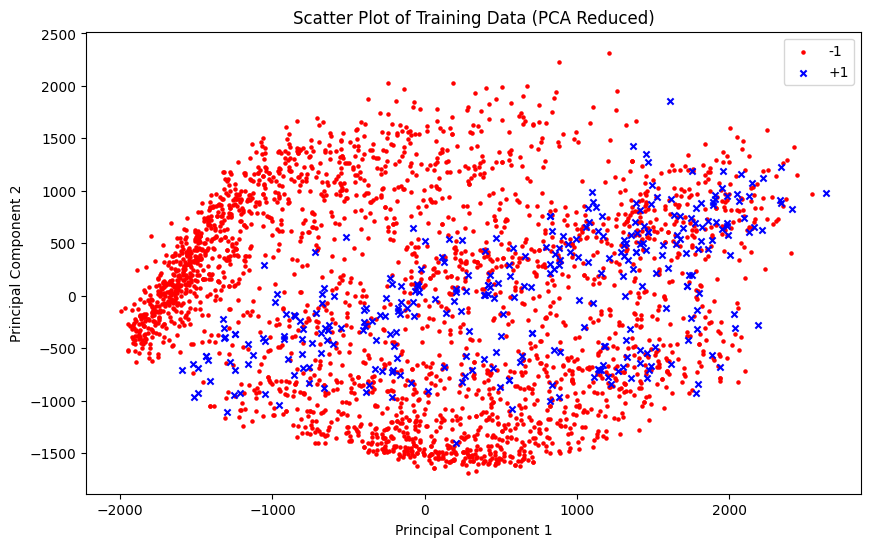

In [7]:
plt.figure(figsize=(10, 6))

# Create a scatter plot with different colors for each class
plt.scatter(X_reduced[Ytrain == -1, 0], X_reduced[Ytrain == -1, 1], \
    label='-1', c='red', marker='.', s=20)
plt.scatter(X_reduced[Ytrain == 1, 0], X_reduced[Ytrain == 1, 1], \
    label='+1', c='blue', marker='x', s=20)

# Add labels and a legend
plt.title('Scatter Plot of Training Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Show the plot
plt.show()

In the scatter plot, we observe significant overlap between data points labeled +1 and -1. Specifically, training samples labeled -1 exhibit a more diverse distribution, while those labeled +1 only cover a subset. This aligns with concerns raised during the data exploration stage, where it was noted that nearly all images labeled +1 represent upper garments, whereas images labeled -1 encompass a variety of items, including upper and lower clothing, shoes, and bags. Thus, the positive and negative labels seem to approximate the criterion of "whether it is an upper garment. However, based on this criterion, there may be challenges in the accuracy of data labeling, as some images representing upper garments may have been wrongly labeled as -1.

### ii. Training and Test Data

*Reduce the number of dimensions of the training and test data together using PCA to 2 and plot a scatter plot of the training and test data showing examples of each set in a different colour. What are your observations about the data based on this plot?*

In [8]:
# Concatenate training and test data for joint PCA
X_combined = np.vstack((Xtrain, Xtest))

# Apply PCA for dimensionality reduction to 2 dimensions
pca = PCA(n_components=2)
X_combined_reduced = pca.fit_transform(X_combined)

# Separate the combined data back into training and test data
Xtrain_reduced = X_combined_reduced[:len(Xtrain)]
Xtest_reduced = X_combined_reduced[len(Xtrain):]

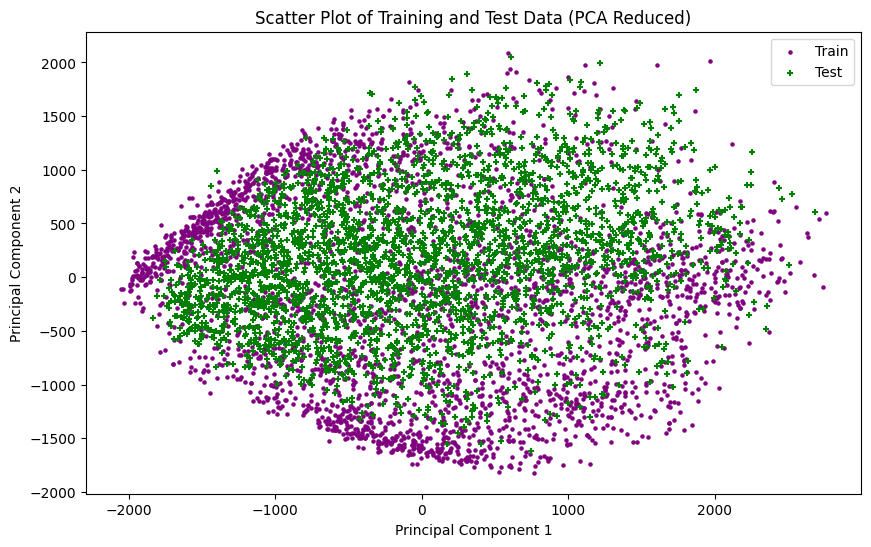

In [9]:
plt.figure(figsize=(10, 6))

# Create a scatter plot with different colors for training and test data
plt.scatter(Xtrain_reduced[:, 0], Xtrain_reduced[:, 1], \
    label='Train', c='purple', marker='.', s=20)
plt.scatter(Xtest_reduced[:, 0], Xtest_reduced[:, 1], \
    label='Test', c='green', marker='+', s=20)

# Add labels and a legend
plt.title('Scatter Plot of Training and Test Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Show the plot
plt.show()

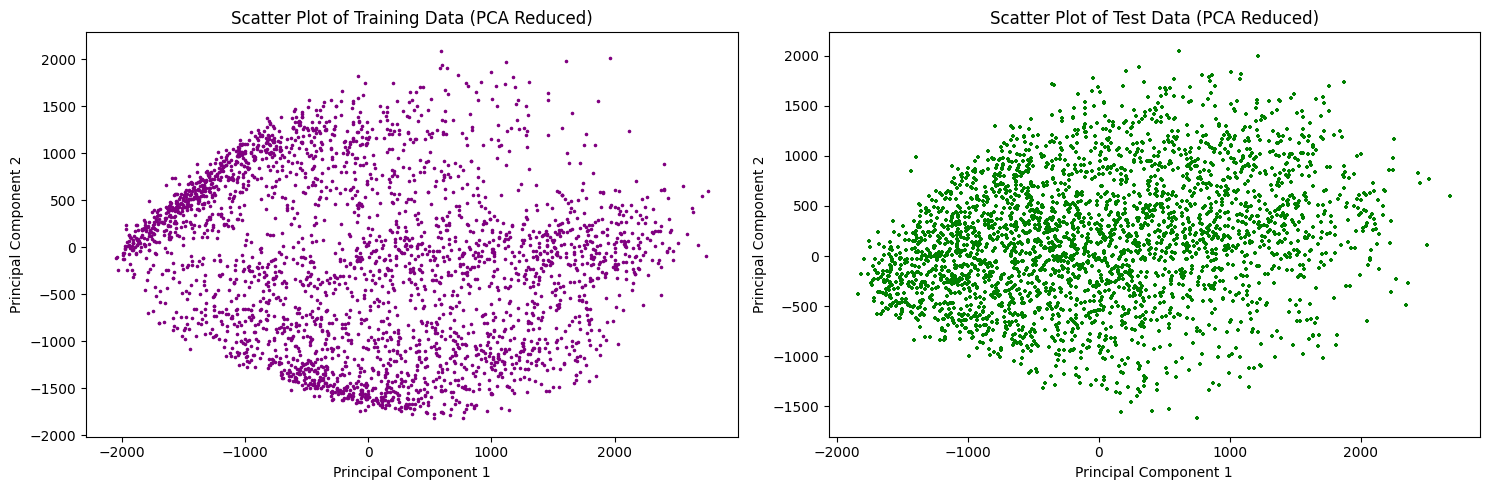

In [10]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plotting the training data on the left subplot
plt.subplot(1, 2, 1)
plt.scatter(Xtrain_reduced[:, 0], Xtrain_reduced[:, 1], c='purple', marker='.', s=10)
plt.title('Scatter Plot of Training Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plotting the test data on the right subplot
plt.subplot(1, 2, 2)
plt.scatter(Xtest_reduced[:, 0], Xtest_reduced[:, 1], c='green', marker='+', s=10)
plt.title('Scatter Plot of Test Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

The scatter plots of both the training and test data exhibit an oval shape, with their positions roughly overlapping and a tendency for denser points on the left and sparser points on the right. However, on the left side of the plot, the density of training data is concentrated along the boundary of the shape, whereas the test data is more concentrated within the interior of the shape. This observation indicates both similarities and certain distinctions in the distribution of training and test data.

### iii. PCA Screen Graph

*Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set.*

In [8]:
# Apply PCA
pca = PCA()
Xtrain_pca = pca.fit_transform(Xtrain)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

In [20]:
# Plot the scree graph
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='.')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot of PCA')
plt.grid(True)
plt.show()

# Find the number of dimensions that explain 95% variance
num_dimensions_95_percent_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of dimensions for 95% variance: {num_dimensions_95_percent_variance}')

NameError: name 'cumulative_variance_ratio' is not defined

The number of dimensions that explain 95% variance in the training set is 168.

### iv. Classification

*Reduce the number of dimensions of the data using PCA and perform classification. You may want to select different principal components for the classification (not necessarily the first few). What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization!*

We may want to use the training data preprocessed with min-max scaling when it comes to classification. We pick the number of principal components to be 200, which accounts for explaining 96% variance in the training set.

In [9]:
from sklearn.decomposition import PCA

# PCA for Dimensionality Reduction
pca = PCA(n_components=200)
Xtrain_minmax_pca = pca.fit_transform(Xtrain_minmax)
Xtest_minmax_pca = pca.fit_transform(Xtest_minmax)

print(f'200 of dimensions for {cumulative_variance_ratio[200]} variance')

200 of dimensions for 0.9599706938611755 variance


In [5]:
# Define the parameter grid for SVM
param_grid_svm = [
    {
        'kernel': ['linear'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    {
        'kernel': ['poly'],
        'degree': [2, 3, 4, 5],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    {
        'kernel': ['rbf'],
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
]

In [10]:
# Create the SVM classifier and perform grid search
svm_search = grid_search(SVC(probability=True), param_grid_svm, Xtrain_minmax_pca, Ytrain)

# Print the best parameters
print("Best Parameters", svm_search.best_params_)

# Print the best cross-validated MCC
print("Best MCC score:", svm_search.best_score_)

Best Parameters {'C': 1000, 'degree': 4, 'kernel': 'poly'}
Best MCC score: 0.6148907830750657


In [11]:
relevant_info = sorted_score(svm_search)

# Print the sorted information
for info in relevant_info:
    if (info['mean_mcc'] > 0):
        print(f"{str(info['params']):<50} Mean: {info['mean_mcc']:<15.4f} Std: {info['std_mcc']:.4f}")

{'C': 1000, 'degree': 4, 'kernel': 'poly'}         Mean: 0.6149          Std: 0.0440
{'C': 10, 'degree': 2, 'kernel': 'poly'}           Mean: 0.6042          Std: 0.0476
{'C': 100, 'degree': 4, 'kernel': 'poly'}          Mean: 0.6020          Std: 0.0523
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}         Mean: 0.5898          Std: 0.0457
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}        Mean: 0.5898          Std: 0.0457
{'C': 1000, 'degree': 2, 'kernel': 'poly'}         Mean: 0.5864          Std: 0.0408
{'C': 100, 'degree': 2, 'kernel': 'poly'}          Mean: 0.5851          Std: 0.0389
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}          Mean: 0.5841          Std: 0.0412
{'C': 100, 'degree': 3, 'kernel': 'poly'}          Mean: 0.5785          Std: 0.0425
{'C': 1000, 'degree': 3, 'kernel': 'poly'}         Mean: 0.5774          Std: 0.0419
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}        Mean: 0.5342          Std: 0.0557
{'C': 10, 'degree': 3, 'kernel': 'poly'}           Mean: 0.5334  

In [12]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [13]:
# Create the RF classifier and perform grid search
rf_search = grid_search(RandomForestClassifier(random_state=42), param_grid_rf, Xtrain_minmax_pca, Ytrain)

# Print the best parameters
print("Best Parameters", rf_search.best_params_)

# Print the best cross-validated MCC
print("Best MCC score:", rf_search.best_score_)

Best Parameters {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best MCC score: 0.3091567988565108


In [14]:
relevant_info = sorted_score(rf_search)

# Print the sorted information
print("Top 10 parameter combinations:\n" + '-'*117)
for info in relevant_info[:10]:
    print(f"{str(info['params']):<90} Mean: {info['mean_mcc']:<8.4f} Std: {info['std_mcc']:.4f}")

print("\nBottom 10 parameter combinations:\n" + '-'*117)
for info in relevant_info[-10:]:
    print(f"{str(info['params']):<90} Mean: {info['mean_mcc']:<8.4f} Std: {info['std_mcc']:.4f}")

Top 10 parameter combinations:
---------------------------------------------------------------------------------------------------------------------
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}    Mean: 0.3092   Std: 0.0245
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}      Mean: 0.3092   Std: 0.0245
{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}      Mean: 0.3092   Std: 0.0245
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}       Mean: 0.3040   Std: 0.0299
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}    Mean: 0.3013   Std: 0.0517
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}      Mean: 0.3013   Std: 0.0517
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}    Mean: 0.2992   Std: 0.0288
{'max_depth': 20, 'min_sa

In [15]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

In [16]:
# Create the KNN classifier and perform grid search
knn_search = grid_search(KNeighborsClassifier(), param_grid_knn, Xtrain_minmax_pca, Ytrain)

# Print the best parameters
print("Best Parameters", knn_search.best_params_)

# Print the best cross-validated MCC
print("Best MCC score:", knn_search.best_score_)

Best Parameters {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Best MCC score: 0.522353904688055


In [17]:
relevant_info = sorted_score(knn_search)

# Print the sorted information
for info in relevant_info:
    print(f"{str(info['params']):<60} Mean: {info['mean_mcc']:<15.4f} Std: {info['std_mcc']:.4f}")

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}            Mean: 0.5224          Std: 0.0216
{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}            Mean: 0.5178          Std: 0.0312
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}            Mean: 0.5141          Std: 0.0330
{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}            Mean: 0.5111          Std: 0.0239
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}            Mean: 0.5106          Std: 0.0439
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}            Mean: 0.5104          Std: 0.0381
{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}            Mean: 0.5073          Std: 0.0417
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}            Mean: 0.5013          Std: 0.0562
{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}             Mean: 0.4997          Std: 0.0165
{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}             Mean: 0.4947          Std: 0.0266
{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}  

In [18]:
from sklearn.decomposition import PCA

# PCA for Dimensionality Reduction
pca = PCA(n_components=100)
Xtrain_minmax_pca = pca.fit_transform(Xtrain_minmax)
Xtest_minmax_pca = pca.fit_transform(Xtest_minmax)

print(f'100 of dimensions for {cumulative_variance_ratio[100]} variance')

100 of dimensions for 0.9183687333798881 variance


In [19]:
# Create the SVM classifier and perform grid search
svm_search = grid_search(SVC(probability=True), param_grid_svm, Xtrain_minmax_pca, Ytrain)

# Print the best parameters
print("Best Parameters", svm_search.best_params_)

# Print the best cross-validated MCC
print("Best MCC score:", svm_search.best_score_)

Best Parameters {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best MCC score: 0.6073042542553287


In [20]:
relevant_info = sorted_score(svm_search)

# Print the sorted information
for info in relevant_info:
    if (info['mean_mcc'] > 0):
        print(f"{str(info['params']):<50} Mean: {info['mean_mcc']:<15.4f} Std: {info['std_mcc']:.4f}")

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}        Mean: 0.6073          Std: 0.0501
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}         Mean: 0.6034          Std: 0.0489
{'C': 100, 'degree': 4, 'kernel': 'poly'}          Mean: 0.5861          Std: 0.0736
{'C': 1000, 'degree': 4, 'kernel': 'poly'}         Mean: 0.5828          Std: 0.0725
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}       Mean: 0.5756          Std: 0.0373
{'C': 10, 'degree': 2, 'kernel': 'poly'}           Mean: 0.5731          Std: 0.0484
{'C': 100, 'degree': 2, 'kernel': 'poly'}          Mean: 0.5680          Std: 0.0472
{'C': 1000, 'degree': 3, 'kernel': 'poly'}         Mean: 0.5677          Std: 0.0459
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}          Mean: 0.5668          Std: 0.0569
{'C': 1000, 'degree': 2, 'kernel': 'poly'}         Mean: 0.5642          Std: 0.0437
{'C': 100, 'degree': 3, 'kernel': 'poly'}          Mean: 0.5580          Std: 0.0517
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}           Mean: 0.5417  

In [21]:
# Create the RF classifier and perform grid search
rf_search = grid_search(RandomForestClassifier(random_state=42), param_grid_rf, Xtrain_minmax_pca, Ytrain)

# Print the best parameters
print("Best Parameters", rf_search.best_params_)

# Print the best cross-validated MCC
print("Best MCC score:", rf_search.best_score_)

Best Parameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best MCC score: 0.41126860914186497


In [22]:
relevant_info = sorted_score(rf_search)

# Print the sorted information
print("Top 10 parameter combinations:\n" + '-'*117)
for info in relevant_info[:10]:
    print(f"{str(info['params']):<90} Mean: {info['mean_mcc']:<8.4f} Std: {info['std_mcc']:.4f}")

print("\nBottom 10 parameter combinations:\n" + '-'*117)
for info in relevant_info[-10:]:
    print(f"{str(info['params']):<90} Mean: {info['mean_mcc']:<8.4f} Std: {info['std_mcc']:.4f}")

Top 10 parameter combinations:
---------------------------------------------------------------------------------------------------------------------
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}     Mean: 0.4113   Std: 0.0346
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}       Mean: 0.4113   Std: 0.0346
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}       Mean: 0.4113   Std: 0.0346
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}      Mean: 0.4016   Std: 0.0175
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}    Mean: 0.4011   Std: 0.0270
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}      Mean: 0.4011   Std: 0.0270
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}      Mean: 0.3977   Std: 0.0189
{'max_depth': None, 'min_

In [23]:
# Create the KNN classifier and perform grid search
knn_search = grid_search(KNeighborsClassifier(), param_grid_knn, Xtrain_minmax_pca, Ytrain)

# Print the best parameters
print("Best Parameters", knn_search.best_params_)

# Print the best cross-validated MCC
print("Best MCC score:", knn_search.best_score_)

Best Parameters {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best MCC score: 0.5330812051258654


In [24]:
relevant_info = sorted_score(knn_search)

# Print the sorted information
for info in relevant_info:
    print(f"{str(info['params']):<60} Mean: {info['mean_mcc']:<15.4f} Std: {info['std_mcc']:.4f}")

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}            Mean: 0.5331          Std: 0.0383
{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}            Mean: 0.5219          Std: 0.0489
{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}             Mean: 0.5194          Std: 0.0397
{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}            Mean: 0.5184          Std: 0.0370
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}            Mean: 0.5157          Std: 0.0362
{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}            Mean: 0.5120          Std: 0.0283
{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}             Mean: 0.5092          Std: 0.0504
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}            Mean: 0.5076          Std: 0.0227
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}            Mean: 0.5043          Std: 0.0374
{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}             Mean: 0.5041          Std: 0.0385
{'n_neighbors': 9, 'p': 2, 'weights': 'distance'} 

In [25]:
from sklearn.decomposition import PCA

# PCA for Dimensionality Reduction
pca = PCA(n_components=300)
Xtrain_minmax_pca = pca.fit_transform(Xtrain_minmax)
Xtest_minmax_pca = pca.fit_transform(Xtest_minmax)

print(f'300 of dimensions for {cumulative_variance_ratio[300]} variance')

300 of dimensions for 0.9791358996544576 variance


In [26]:
# Create the SVM classifier and perform grid search
svm_search = grid_search(SVC(probability=True), param_grid_svm, Xtrain_minmax_pca, Ytrain)

# Print the best parameters
print("Best Parameters", svm_search.best_params_)

# Print the best cross-validated MCC
print("Best MCC score:", svm_search.best_score_)

Best Parameters {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best MCC score: 0.6051889664732382


In [27]:
relevant_info = sorted_score(svm_search)

# Print the sorted information
for info in relevant_info:
    if (info['mean_mcc'] > 0):
        print(f"{str(info['params']):<50} Mean: {info['mean_mcc']:<15.4f} Std: {info['std_mcc']:.4f}")

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}         Mean: 0.6052          Std: 0.0519
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}        Mean: 0.6052          Std: 0.0519
{'C': 10, 'degree': 2, 'kernel': 'poly'}           Mean: 0.6035          Std: 0.0534
{'C': 1000, 'degree': 4, 'kernel': 'poly'}         Mean: 0.5999          Std: 0.0451
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}          Mean: 0.5990          Std: 0.0568
{'C': 100, 'degree': 2, 'kernel': 'poly'}          Mean: 0.5979          Std: 0.0341
{'C': 100, 'degree': 4, 'kernel': 'poly'}          Mean: 0.5917          Std: 0.0467
{'C': 1000, 'degree': 2, 'kernel': 'poly'}         Mean: 0.5913          Std: 0.0398
{'C': 100, 'degree': 3, 'kernel': 'poly'}          Mean: 0.5895          Std: 0.0481
{'C': 1000, 'degree': 3, 'kernel': 'poly'}         Mean: 0.5895          Std: 0.0481
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}        Mean: 0.5543          Std: 0.0459
{'C': 10, 'degree': 3, 'kernel': 'poly'}           Mean: 0.5399  

In [28]:
# Create the RF classifier and perform grid search
rf_search = grid_search(RandomForestClassifier(random_state=42), param_grid_rf, Xtrain_minmax_pca, Ytrain)

# Print the best parameters
print("Best Parameters", rf_search.best_params_)

# Print the best cross-validated MCC
print("Best MCC score:", rf_search.best_score_)

Best Parameters {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best MCC score: 0.27125961667441423


In [29]:
relevant_info = sorted_score(rf_search)

# Print the sorted information
print("Top 10 parameter combinations:\n" + '-'*117)
for info in relevant_info[:10]:
    print(f"{str(info['params']):<90} Mean: {info['mean_mcc']:<8.4f} Std: {info['std_mcc']:.4f}")

print("\nBottom 10 parameter combinations:\n" + '-'*117)
for info in relevant_info[-10:]:
    print(f"{str(info['params']):<90} Mean: {info['mean_mcc']:<8.4f} Std: {info['std_mcc']:.4f}")

Top 10 parameter combinations:
---------------------------------------------------------------------------------------------------------------------
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}       Mean: 0.2713   Std: 0.0434
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}    Mean: 0.2638   Std: 0.0113
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}      Mean: 0.2638   Std: 0.0113
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}      Mean: 0.2638   Std: 0.0113
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}     Mean: 0.2566   Std: 0.0295
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}       Mean: 0.2566   Std: 0.0295
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}    Mean: 0.2523   Std: 0.0135
{'max_depth': 20, 'min_sa

In [30]:
# Create the KNN classifier and perform grid search
knn_search = grid_search(KNeighborsClassifier(), param_grid_knn, Xtrain_minmax_pca, Ytrain)

# Print the best parameters
print("Best Parameters", knn_search.best_params_)

# Print the best cross-validated MCC
print("Best MCC score:", knn_search.best_score_)

Best Parameters {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best MCC score: 0.5237980166613563


In [31]:
relevant_info = sorted_score(knn_search)

# Print the sorted information
for info in relevant_info:
    print(f"{str(info['params']):<60} Mean: {info['mean_mcc']:<15.4f} Std: {info['std_mcc']:.4f}")

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}            Mean: 0.5238          Std: 0.0374
{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}            Mean: 0.5148          Std: 0.0215
{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}            Mean: 0.5076          Std: 0.0373
{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}            Mean: 0.5071          Std: 0.0541
{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}             Mean: 0.5046          Std: 0.0321
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}            Mean: 0.4950          Std: 0.0667
{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}             Mean: 0.4919          Std: 0.0179
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}            Mean: 0.4900          Std: 0.0522
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}            Mean: 0.4893          Std: 0.0404
{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}            Mean: 0.4873          Std: 0.0379
{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}  

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, \
    roc_auc_score, average_precision_score, f1_score, matthews_corrcoef

metrics = {
    'Accuracy': accuracy_score,
    'Balanced Accuracy': balanced_accuracy_score,
    'ROC AUC': roc_auc_score,
    'PR AUC': average_precision_score,
    'F1 Score': f1_score,
    'MCC': matthews_corrcoef
}

kernelized_svm = SVC(probability=True, C=1000, gamma=0.001, kernel='rbf')

# Perform 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True)
metric_values_list = {metric_name: [] for metric_name in metrics}

for train_index, test_index in skf.split(Xtrain_minmax_pca, Ytrain):
    X_train_fold, X_test_fold = Xtrain_minmax_pca[train_index], Xtrain_minmax_pca[test_index]
    Y_train_fold, Y_test_fold = Ytrain[train_index], Ytrain[test_index]

    # Fit the classifier on the training data
    kernelized_svm.fit(X_train_fold, Y_train_fold)

    # Loop through each metric
    for metric_name, metric_func in metrics.items():
        # Make predictions on the test data
            predictions = kernelized_svm.predict(X_test_fold)
            probabilities = kernelized_svm.predict_proba(X_test_fold)[:, 1]

            # Calculate the metric for this fold
            if metric_name in ['ROC AUC', 'PR AUC']:
                metric_value = metric_func(Y_test_fold, probabilities)
            else:
                metric_value = metric_func(Y_test_fold, predictions)
            metric_values_list[metric_name].append(metric_value)
    
# Print the average and standard deviation of the metrics across all folds
for metric_name, metric_values in metric_values_list.items():
    average_value = np.mean(metric_values)
    std_dev_value = np.std(metric_values)
    print(f"Average {metric_name}: {average_value:.4f} (Std Dev: {std_dev_value:.4f})")

Average Accuracy: 0.9177 (Std Dev: 0.0113)
Average Balanced Accuracy: 0.7905 (Std Dev: 0.0234)
Average ROC AUC: 0.9178 (Std Dev: 0.0120)
Average PR AUC: 0.6270 (Std Dev: 0.0584)
Average F1 Score: 0.6142 (Std Dev: 0.0426)
Average MCC: 0.5692 (Std Dev: 0.0484)


With the number of dimensions reduced to 200, the (optimal) cross-validation performance of our Kernelized SVM classification with PCA is approximately the same as Kernelized SVM classification without PCA as shown in Question 3.